In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML, Image

import numpy as np
import scipy as sp
import math


# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In an election with $N$ ballots between two candidates, A and B, all possible outcomes are given by the triangle formed by plotting the votes for candidate A, $V_A$, and the votes for candidate B, $V_B$.

$V_A$ and $V_B$ are bounded by 0 and $N$. 

Text(0, 0.5, 'Votes for Candidate B')

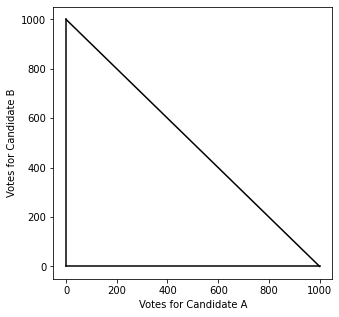

In [3]:
N = 1000

fig, ax = plt.subplots(figsize=(5,5))
ax.plot([0, N], [N, 0], color="black")
ax.plot([0, N], [0, 0], color="black")
ax.plot([0, 0], [0, N], color="black")

ax.set_xlabel('Votes for Candidate A')
ax.set_ylabel('Votes for Candidate B')

An election result can be thought of the ordered pair $(R_A, R_B)$, where each $R$ is the votes for that candidate in the election. For an election where candidate A got 50 votes, and candidate B got 40 out of 100 total votes,

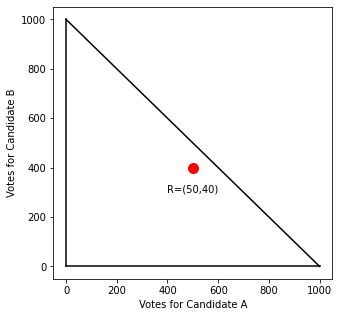

In [4]:
ax.plot([500], [400], marker='.', markersize=20, color='r')
ax.annotate("R=(50,40)", (400, 300))

fig

Note that all election result corresponding to a tie are given by the line $V_A = V_B$. 

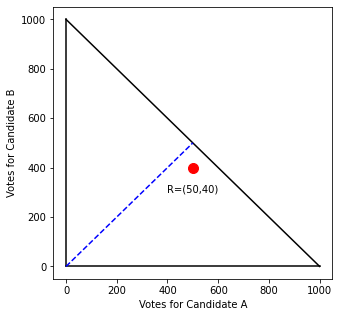

In [5]:
ax.plot([0, N/2], [0, N/2], 'b--')

fig

An election where candidate A wins corresponds to the part of this figure below the tie line. Conversely, elections that candidate B wins correspond to the area above the line. Note that the statement "A didn't win" corresponds to the area where B wins _and also the tie line iteself_.

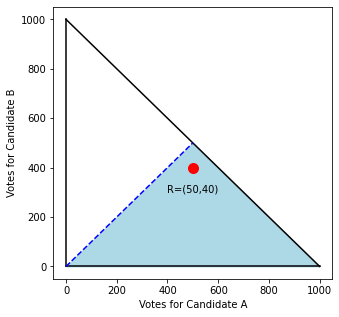

In [6]:
ax.fill_between([0, N/2, N], [0, N/2, 0], color='lightblue')

fig

In a ballot polling audit, we take a sample $S$ of the ballots, given by $(S_A, S_B)$. This sample provides a bound on the possible election results. It must be the case that $$V_A \geq S_A \geq 0.$$ Likewise for $V_B$ and $S_B$.

Note that the value $S_A$ also constrains $V_B$, since any vote for candidate $A$ reduces the total number of votes that candidate B could receive out of the total: $$N - S_A \geq V_B \geq 0.$$

Imagine we draw a sample of 30 ballots, with 15 votes for candidate A, 12 for candidate B, and three ballots with no vote for either candidate. $$S = (15, 12)$$. 

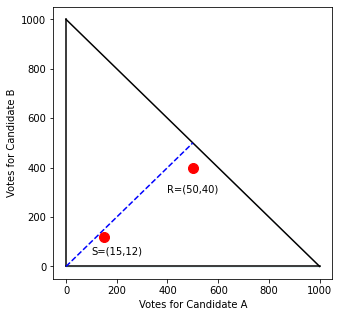

In [7]:
S = {"A": 150, "B":120}
U = 3
ax.fill_between([0, N/2, N], [0, N/2, 0], color='white')
ax.plot([150], [120], marker='.', markersize=20, color='r')
ax.annotate("S=(15,12)", (100, 50))
fig

Note that this isn't the full picture. Even though our graph shows a sample size of 27, we sampled 30 ballots. The 3 undervotes still reduce the number of election outcomes possible! If we observe $U$ undervotes in our sample, $V_A$ and $V_B$ are bounded above: $$N - S_B - U \geq V_A \geq S_A$$ $$N - S_A - U \geq V_B \geq S_B$$ 

We can plot the space of election outcomes possible given our sample:

Min V_A: 150 Max V_A: 877
Min V_B: 120 Max V_B: 847


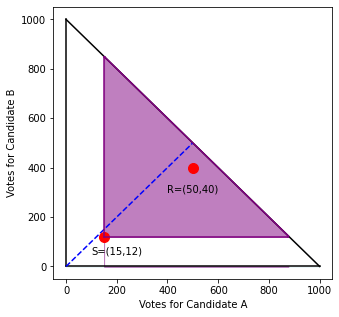

In [8]:
print('Min V_A: {} Max V_A: {}'.format(S["A"], N - S["B"] - U))
ax.plot([S["A"], N - S["B"] - U], [S["B"], S["B"]], color='purple')
# Get intercept
y = -(N - S["B"] - U) + N
ax.plot([N - S["B"] - U, N - S["B"] - U], [S["B"], y], color='purple')

print('Min V_B: {} Max V_B: {}'.format(S["B"], N - S["A"] - U))
ax.plot([S["A"], S["A"]], [S["B"], N - S["A"] - U], color='purple')
# Get intercept
x = N - (N - S["A"] - U)
ax.plot([S["A"], x], [N - S["A"] - U, N - S["A"] - U], color='purple')
ax.plot([x, N - S["B"] - U], [N - S["A"]- U, y], color='purple')

points = [
        [S["A"], S["B"]], 
        [N - S["B"] - U, S["B"]], 
        [N - S["B"] - U, y], 
        [x, N - S["A"] - U],
        [S["A"], N - S["A"] - U],
        [S["A"], S["B"]]
    ]

xs, ys = zip(*points)
ax.fill_between(xs, ys, color="purple", alpha=.5)

fig

Note that The area of the possible elections where the loser (candidate B) won is smaller than the area where the winner won! If we assume all possible election outcomes are equally likely, the ratio of the area of possible elections where Candidate A won to the total area of the possible elections given the sample are the likelihood that the winner didn't win.

If we have a different sample, where the winner one all of the votes, i.e. $S = (30, 0)$, the chance that A actually won is much higher, because the area where B wins or ties is much smaller.

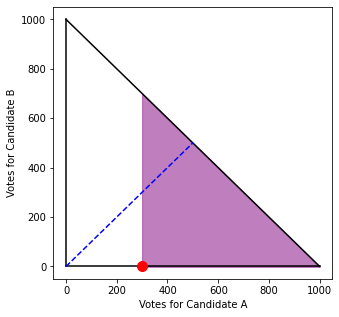

In [9]:
ax.cla()
ax.plot([0, N], [N, 0], color="black")
ax.plot([0, N], [0, 0], color="black")
ax.plot([0, 0], [0, N], color="black")
ax.plot([0, N/2], [0, N/2], 'b--')


ax.set_xlabel('Votes for Candidate A')
ax.set_ylabel('Votes for Candidate B')


S = {"A": 300, "B":0}
U = 0

ax.plot(S["A"], S["B"], marker='.', markersize=20, color='r')

y = -(N - S["B"] - U) + N
x = N - (N - S["A"] - U)

points = [
        [S["A"], S["B"]], 
        [N - S["B"] - U, S["B"]], 
        [N - S["B"] - U, y], 
        [x, N - S["A"] - U],
        [S["A"], N - S["A"] - U],
        [S["A"], S["B"]]
    ]

xs, ys = zip(*points)
ax.fill_between(xs, ys, color="purple", alpha=.5)

fig

The total area of $E$ is the total probability of an election outcome given a sample. The area of $E$ above the tie line represents outcomes where candidate B wins, and the ratio of that area to the area of $E$ represents the probability that B has won given the sample. 

In [10]:
# Total area of E
E = 1/2*((N - S['A'] - S['B'])**2 - U**2)

# Part of E where B wins
E_B = 1/4*(N - 2*S['A'])**2 - 1/2*U**2

E_A = E - E_B

# Normalizing
frac_b = E_B/E
frac_a = E_A/E

print('A wins {}% of the time given the sample, B wins {}% of the time'.format(round(frac_a, 2)*100, round(frac_b, 2)*100))

A wins 84.0% of the time given the sample, B wins 16.0% of the time


**Remark:** these probabilities do not depend on how the sample was taken. That means that any auditing regime can be applied to these calculations to get an upper bound on the probability that the election outcome was wrong, based on the audit. 

In [27]:
# A multi-stage audit
S_n = [
    {"A": 0, "B": 0},
    {"A": 150, "B": 120},
    {"A": 300, "B": 240},
    {"A": 400, "B": 300},
    {"A": 450, "B": 360},
]

U_n = [0, 10, 30, 50, 100]

def winning_probs(i):
    S = S_n[i]
    U = U_n[i]
    
    # Total area of E
    E = 1/2*(N - S['A'] - S['B'])**2 - U**2

    # Part of E where B wins
    E_B = 1/4*(N - 2*S['A'])**2 - 1/2*U**2

    E_A = E - E_B

    
    if E_B < 0:
        E_B = 0
    elif E_B > E:
        E_B = E
        
    if E_A < 0:
        E_A = 0
    elif E_A > E:
        E_A = E

    # Normalizing
    frac_b = E_B/E
    frac_a = E_A/E
        
    ax.set_title('{}% chance A won,\n{}% Chance B won'.format(int(round(frac_a, 2)*100), int(round(frac_b, 2)*100)))
    
    return ax


def draw_probable_outcomes(i):
    
    S = S_n[i]
    U = U_n[i]
    
    # Draw first area
    ax.cla()
    ax.plot([0, N], [N, 0], color="black")
    ax.plot([0, N], [0, 0], color="black")
    ax.plot([0, 0], [0, N], color="black")
    ax.plot([0, N/2], [0, N/2], 'b--')
    ax.set_xlabel('Votes for Candidate A')
    ax.set_ylabel('Votes for Candidate B')

    y = -(N - S["B"] - U) + N
    x = N - (N - S["A"] - U)

    points = [
        [S["A"], S["B"]], 
        [N - S["B"] - U, S["B"]], 
        [N - S["B"] - U, y], 
        [x, N - S["A"] - U],
        [S["A"], N - S["A"] - U],
        [S["A"], S["B"]]
    ]

    xs, ys = zip(*points)
    
    shape = ax.fill_between(xs, ys, color="purple", alpha=.5)
    
    
    ax.plot([S["A"]], [S["B"]], marker='.', markersize=20, color='r')
    ax.annotate("S=({},{})".format(S["A"], S["B"]), (S["A"]-20, S["B"]-70))
    
    return shape, ax

def update(i):
    draw_probable_outcomes(i)
    winning_probs(i)

anim = FuncAnimation(fig, update, frames=5, interval=1000)
anim.save('media/wide_margin.gif', writer='imagemagick', fps=1)
Image(url='media/wide_margin.gif')

0
0
1
2
3
4


This picture shows that as our sample grows, the space of possible election outcomes shrinks. If the sample shows that one candidate received more votes than the other, the proportion of likely outcomes favoring that candidate grows (and vice-versa for the loser). 

In [12]:
# A multi-stage audit
S_n = [
    {"A": 0, "B": 0},
    {"A": 150, "B": 120},
    {"A": 200, "B": 240},
    {"A": 350, "B": 300},
    {"A": 400, "B": 400},
]

U_n = [0, 10, 30, 50, 100]


anim = FuncAnimation(fig, update, frames=5, interval=1000)
anim.save('media/close_margin.gif', writer='imagemagick', fps=1)
Image(url='media/close_margin.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


By contrast, if the samples stay around the tie line, then the chances that one candidate or another wins stay closer to 50%. 

### Revisiting our assumptions

So far we have only examined a two candidate race where the total number of ballots cast was a known quantity. While we allow for invalid votes, these assumptions are still not particularly flexible. 

The actual number of paper ballots may not be known during the audit (or at any time after the audit). This could lead to scenarios where a sample is drawn that contains more votes than theoretically possible under this model. To account for this, an artificial upper bound on the number of votes $N$, $N*$, could be computed. $N*$ could be the registered voting population, the population in a jurisdiction, or some other number greater than $N$. Choosing an $N*$ that is too large would make it difficult to make strong statements about who won, since the areas of possible elections would be artifially inflated. It is reasonably unlikely that $N*$ would ever need to be more than, say, 10% greater than $N$. Further thinking about this is needed.

The other major limitation of our model thus far is that it only considered two candidates. There are two possible remedies to this as I see it: include all other candidates in the "invalid vote" category." This works when the other candidates receive many fewer votes than the two top candidates, but once the election "flattens out", so that most candidates are getting similar numbers of votes, it becomes problematic. This is a similar idea to pooling used by Stark and others, and has similar drawbacks. 

Another way to deal with more than two candidates is to extend our diagrams into more dimensions. For example, in a three candidate races, our triangle diagrams above would become a tetrahedron. In theory, this extends for an arbitrary number of candidates without loss of generality, as the probabilities that divvy up the volumes or hypervolumes of possible election outcomes scale proportionally with the number of dimensions. 

Finally, the considerations here don't handle more than one winner, or voting regimes where margin calculations are not obvious. These diagrams should apply to plurality and super-majority contests just fine, the dotted "tie" line would just move to $\frac{N}{(\text{number of candidates})}$ or the preset supermajority threshold, respectively. 

### These are upper bounds on the probabilities

While what we have discussed here is *a* method of estimating how likely an election outcome was, is it not the only method. Indeed, audits that can take into account more constrained samples (like samples that are uniformly random or samples that are proportional to error bound) can result in *much* tigher bounds. That is what audits like risk-limiting audits and Bayesian audits seek to do. 

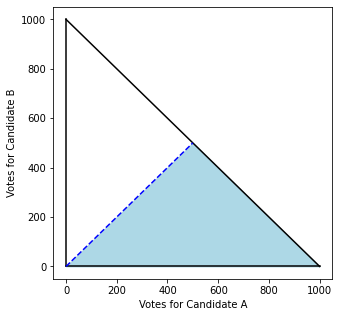

In [13]:
# Let's focus on candidate B winning. 
fig, ax = plt.subplots(figsize=(5,5))
ax.plot([0, N], [N, 0], color="black")
ax.plot([0, N], [0, 0], color="black")
ax.plot([0, 0], [0, N], color="black")
ax.plot([0, N/2], [0, N/2], 'b--')
ax.set_xlabel('Votes for Candidate A')
ax.set_ylabel('Votes for Candidate B')
ax.fill_between([0, N/2, N], [0, N/2, 0], color='lightblue')

### Modelling an audit as a Bernoulli process

We can consider our election audit as a Bernoulli process. The sample size, $S$, is the number of steps, and each step consists of auditing one ballot. If the ballot is for candidate A, we consider the trial a success. If it not, we consider it a failure. If we assume our sample is drawn uniformly at random, this process can be considered a Binomial, and we can compute confidence intervals on the chance that candidate A has won. 

In [14]:
S = {'A': 150, 'B':50}
U = 50
n = S['A'] + S['B'] + U

p_hat = S['A']/n # the proportion of "successful" trials

z = 1.65 # z-score for 95% confidence on one side

p_lower = p_hat - z*((p_hat*(1 - p_hat))/n)**.5
print('Candidate A won with at least {:2.0f}% of the vote with {:2.0f}% certainty.'.format(p_lower*100, 95))

Candidate A won with at least 55% of the vote with 95% certainty.


After we've drawn 250 ballots, imagine that we found that 150 of them for votes for candidate A, and 100 were either votes for candidate B or invalid votes. Since our sample was drawn uniformly at random, we can compute a confidence interval on our sample to get a feel for how likely it is that candidate A won. For a given level of certainty $\alpha$, we compute the lower bound on the $\alpha$-confidence interval. If that bound is greater than 50%, then we can be confident that, given our sample, candidate A won with probability $1 - \alpha$. Note that since we do not care about how much candidate A won by, we can compute just a one-sided confidence interval. Our sample indicates that Candidate A won with 95% certainty.

In [15]:
def compute_lower_confidence(i):
    S = S_n[i]
    U = U_n[i]
    n = S['A'] + S['B'] + U
    p_hat = S['A']/n 
    
    return p_hat - z*((p_hat*(1 - p_hat))/n)**.5
    
def draw_lower_confidence(i):
    lower_confidence = compute_lower_confidence(i)

    S = S_n[i]
    U = U_n[i]
 

    y = -(N - S["B"] - U) + N
    
    ci_x = min(N*lower_confidence, N - S['B'] - U)
    ci_y = min(N*(1 - lower_confidence), N - S['A'] - U)

    points = [
        [S["A"], S["B"]], 
        [N - S["B"] - U, S["B"]], 
        [N - S["B"] - U, y], 
        [ci_x, ci_y],
        [S["A"], S["B"]]
    ]

    xs, ys = zip(*points)
    
    ax.plot([ci_x], [ci_y], marker='.', markersize=20, color='black')
    shape = ax.fill_between(xs, ys, color="pink", alpha=1)
    
    

    return shape, ax
   

def update(i):
    draw_probable_outcomes(i)
    winning_probs(i)
    draw_lower_confidence(i)

As soon as the pink region is entirely below the tie line, our sample indicates that candidate B has at least a 95% chance of being the correct winner. This corresponds to the black point moving under the tie line. 

In [16]:
S_n = [
    {"A": 30, "B": 10},
    {"A": 90, "B": 20},
    {"A": 180, "B": 40},
    {"A": 360, "B": 80},
    {"A": 540, "B": 120}
]

U_n = [0, 10, 20, 40, 60]

anim = FuncAnimation(fig, update, frames=5, interval=1000)
anim.save('media/wide_margin_ci.gif', writer='imagemagick', fps=1)
Image(url='media/wide_margin_ci.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


For wide margins, our sample doesn't have to be very large to confirm the winner with high certainty! The above plot shows samples of an election with a margin of around 50%. A sample as small as 40 ballots is enough to confirm our result with 95% confidence!

In [17]:
S_n = [
    {"A": 22, "B": 18},
    {"A": 50, "B": 40},
    {"A": 120, "B": 100},
    {"A": 240, "B": 200},
    {"A": 360, "B": 290}
]

U_n = [0, 10, 20, 40, 60]

anim = FuncAnimation(fig, update, frames=5, interval=1000)
anim.save('media/close_margin_ci.gif', writer='imagemagick', fps=1)
Image(url='media/close_margin_ci.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


However, for elections with tighter margins, it can take considerably more evidence to find a strong degree of confidence. Even for relatively wide margins, like the 10% one shown above, recounting over 70% of the ballots still isn't enough to determine that Candidate A won with at least 95% confidence. 

In [18]:
S_n = [
    {"A": 22, "B": 18},
    {"A": 50, "B": 40},
    {"A": 120, "B": 100},
    {"A": 240, "B": 200},
    {"A": 360, "B": 290}
]

U_n = [0, 0, 0, 0, 0]

for s in range(len(S_n)):
    print("Sample of size {} has a CI value of {:0.2f}".format(S_n[s]['A'] + S_n[s]['B'], compute_lower_confidence(s) - .5))
    

anim = FuncAnimation(fig, update, frames=5, interval=1000)
anim.save('media/close_margin_no_invalid_ci.gif', writer='imagemagick', fps=1)
Image(url='media/close_margin_no_invalid_ci.gif')

MovieWriter imagemagick unavailable; using Pillow instead.


Sample of size 40 has a CI value of -0.08
Sample of size 90 has a CI value of -0.03
Sample of size 220 has a CI value of -0.01
Sample of size 440 has a CI value of 0.01
Sample of size 650 has a CI value of 0.02


In [19]:

ci_n = 0
bravo_n = 0
z = 1.96
for i in range(1, 1000):
    sample_w = math.ceil(i*.6)
    n = i
    
    p_hat = sample_w/n 
    
    ci = p_hat - z*((p_hat*(1 - p_hat))/n)**.5
    
    if ci >= 1:
        ci = 0
    
    bravo_p = 1/(((2*.6)**sample_w)*((2 - 2*.6)**(i - sample_w)))
    
#     print(i, sample_w, ci, bravo_p)
    
    if not ci_n and ci > .5:
        ci_n = i
    if not bravo_n and bravo_p <= .05:
        bravo_n = i
    
    if ci_n and bravo_n:
        break

print('CI method finished after {} ballots. Bravo finished after {}'.format(ci_n, bravo_n))

        

CI method finished after 77 ballots. Bravo finished after 137


As shown above, relying on confidence intervals is **not** equivalent to the risk-limiting math used by BRAVO. 

## Elections as Vectors

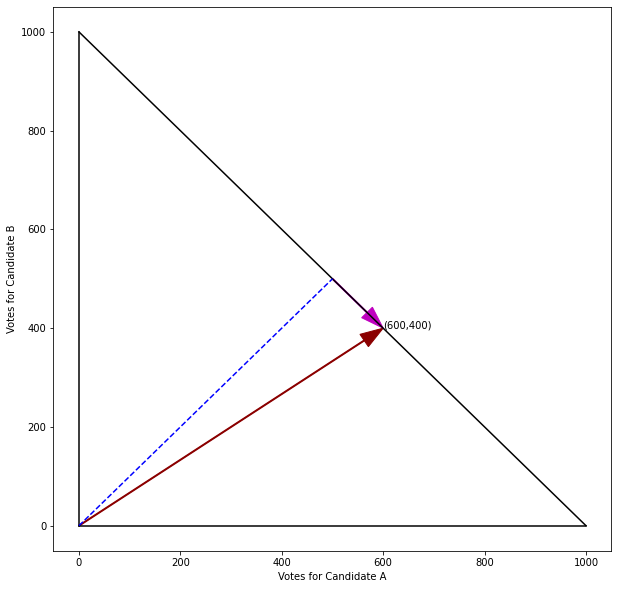

In [20]:
# Vectors! 

fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0, N], [N, 0], color="black")
ax.plot([0, N], [0, 0], color="black")
ax.plot([0, 0], [0, N], color="black")
ax.plot([0, N/2], [0, N/2], 'b--')
ax.set_xlabel('Votes for Candidate A')
ax.set_ylabel('Votes for Candidate B')

origin = np.array([0, 0])

tie = np.array([500, 500])
v_res = np.array([600, 400])
margin =  v_res - tie

ax.arrow(*origin, *v_res, width=2, head_width=30, length_includes_head=True, color='darkred')#, color=['r','b','g'], scale_units='xy', angles='xy', scale=1)
ax.annotate("(600,400)", (600, 400))
ax.arrow(*tie, *margin, width=2, head_width=30, length_includes_head=True, color='m')

Election results can also be drawn as vectors. For a reslt with $v_A$ votes for candidate A, and $v_B$ votes for B, the result vector is $$\vec{\bf v} = \begin{pmatrix}v_A \\ v_B\end{pmatrix}.$$

The margin of victory can be thought of as the shortest vector from the tie line to the reported result vector. We define the tie line as the set of vectors $$T = \{\vec{t} = \begin{pmatrix}v_A \\ v_B\end{pmatrix}, \forall v_A, v_B | v_A = v_B \}.$$ The margin of victory is defined as $$\vec{m} = \min_{\vec{t} \in T} [\vec{\bf v} - \vec{t}]$$

This gives us a good deal of power: we can break the election result into component vectors corresponding to election units: batches or ballots. We denote the set of ballots or batches $B$. Each unit is itself a vector, $\vec{b}$, and $$\vec{\bf v} = \sum_{\vec{b} \in B} \vec{b}$$

Imagine we have an election with 600 votes for candidate A, 400 for candidate B, distributed evenly in 10 batches. Each batch can be modelled as a vector with 60 votes for A, and 40 for B.

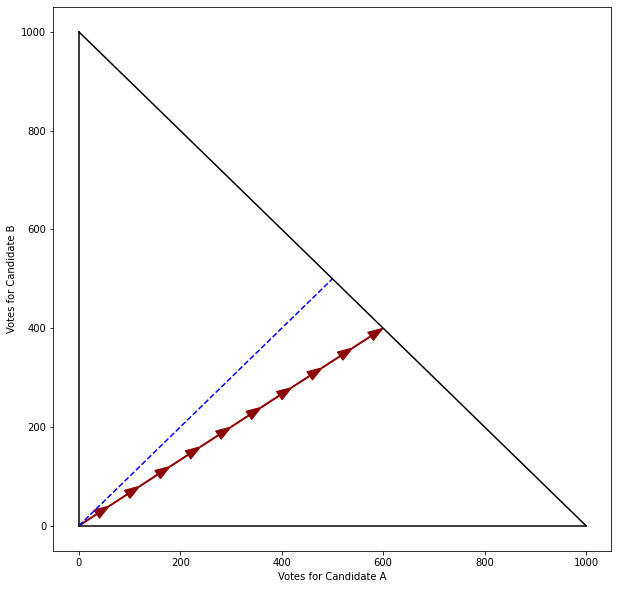

In [21]:
# Vectors! 
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0, N], [N, 0], color="black")
ax.plot([0, N], [0, 0], color="black")
ax.plot([0, 0], [0, N], color="black")
ax.plot([0, N/2], [0, N/2], 'b--')
ax.set_xlabel('Votes for Candidate A')
ax.set_ylabel('Votes for Candidate B')

origin = np.array([0, 0])

v_res = np.array([600, 400])

last = origin
for i in range(1, 11):
    batch = v_res/10
    ax.arrow(*last, *batch, width=2, head_width=20, length_includes_head=True, color='darkred')
    last = last + batch 

Our batches don't have to all contain the same results!

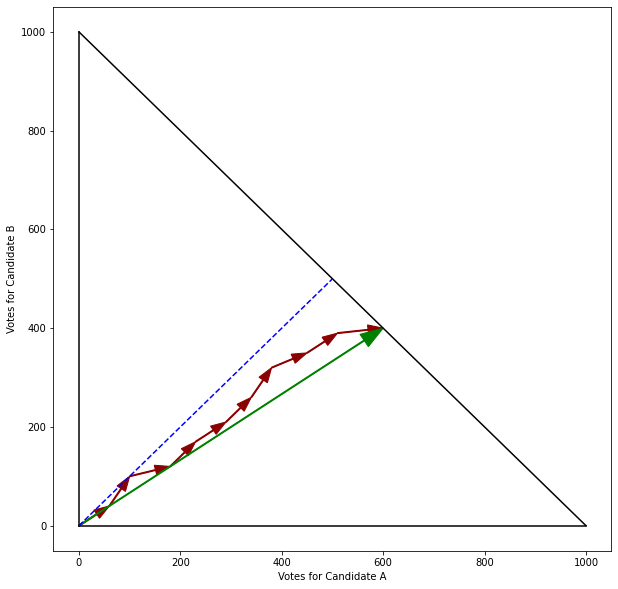

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0, N], [N, 0], color="black")
ax.plot([0, N], [0, 0], color="black")
ax.plot([0, 0], [0, N], color="black")
ax.plot([0, N/2], [0, N/2], 'b--')
ax.set_xlabel('Votes for Candidate A')
ax.set_ylabel('Votes for Candidate B')

origin = np.array([0, 0])

v_res = np.array([600, 400])


batches = np.array([[60, 40], 
                    [40, 60],
                    [80, 20],
                    [50, 50],
                    [60, 40],
                    [50, 50],
                    [40, 60],
                    [70, 30],
                    [60, 40],
                    [90, 10]
                   ])
last = origin
for batch in batches:
    ax.arrow(*last, *batch, width=2, head_width=20, length_includes_head=True, color='darkred')

    last = batch + last
    
ax.arrow(*origin, *v_res, width=2, head_width=30, length_includes_head=True, color='green')


[0 0]
[ 80 120]
[110 140]
[290 180]
[380 190]
[600 400]


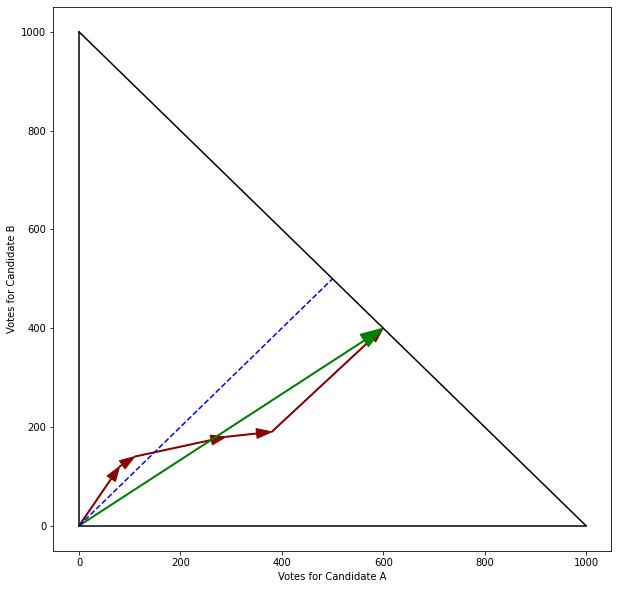

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0, N], [N, 0], color="black")
ax.plot([0, N], [0, 0], color="black")
ax.plot([0, 0], [0, N], color="black")
ax.plot([0, N/2], [0, N/2], 'b--')
ax.set_xlabel('Votes for Candidate A')
ax.set_ylabel('Votes for Candidate B')

origin = np.array([0, 0])

v_res = np.array([600, 400])


batches = np.array([
                    [80, 120],
                    [30, 20],
                    [180, 40],
                    [90, 10],
                    [220, 210],
                   ])
last = origin
for batch in batches:
    ax.arrow(*last, *batch, width=2, head_width=20, length_includes_head=True, color='darkred')
    print(last)
    last = batch + last
    
print(last)
ax.arrow(*origin, *v_res, width=2, head_width=30, length_includes_head=True, color='green')


Batches do not need to be of the same size, either. 

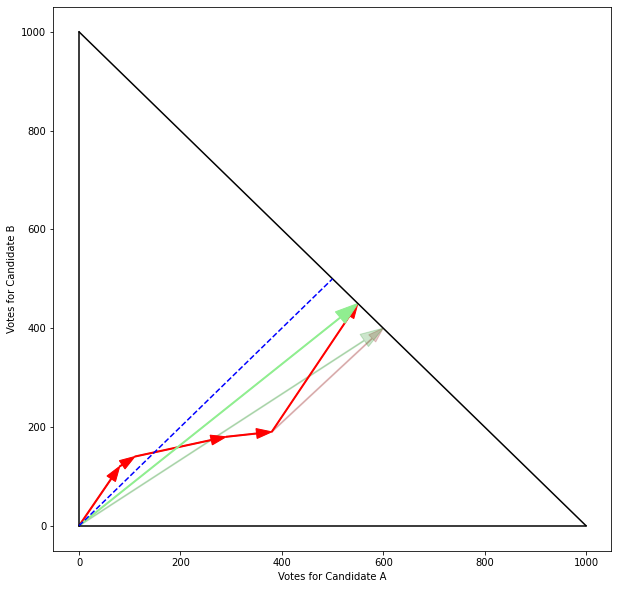

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0, N], [N, 0], color="black")
ax.plot([0, N], [0, 0], color="black")
ax.plot([0, 0], [0, N], color="black")
ax.plot([0, N/2], [0, N/2], 'b--')
ax.set_xlabel('Votes for Candidate A')
ax.set_ylabel('Votes for Candidate B')

origin = np.array([0, 0])

v_res = np.array([600, 400])


batches = np.array([
                    [80, 120],
                    [30, 20],
                    [180, 40],
                    [90, 10],
                    [220, 210],
                   ])
last = origin
for batch in batches:
    ax.arrow(*last, *batch, width=2, head_width=20, length_includes_head=True, color='darkred', alpha=.2)
    last = batch + last
    
ax.arrow(*origin, *v_res, width=2, head_width=30, length_includes_head=True, color='green', alpha=.2)


v_res = np.array([550, 450])


batches = np.array([
                    [80, 120],
                    [30, 20],
                    [180, 40],
                    [90, 10],
                    [170, 260],
                   ])
last = origin
for batch in batches:
    ax.arrow(*last, *batch, width=2, head_width=20, length_includes_head=True, color='red')
    last = batch + last
    
ax.arrow(*origin, *v_res, width=2, head_width=30, length_includes_head=True, color='lightgreen')

If we audit the largest batch and find that the winner didn't win by as much as originally reported, then the overall margin swings closer to the tie line. 

The vector that results from the difference of the original result and the audited result is the **error** vector, $\vec{\bf e}$, shown in red below. 

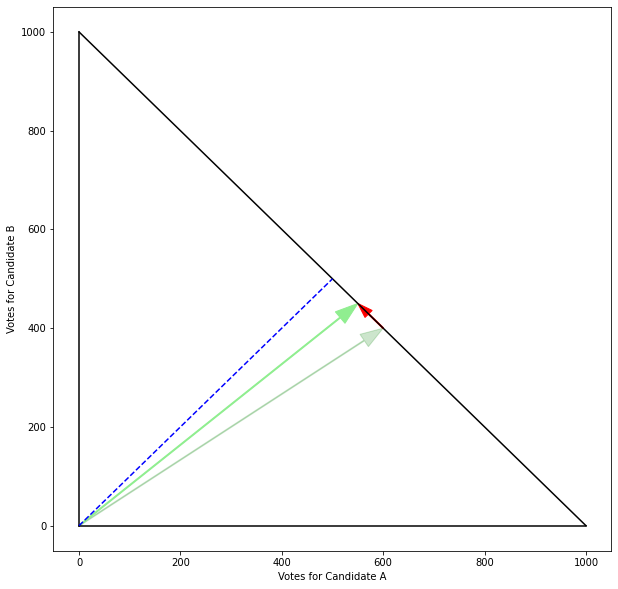

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0, N], [N, 0], color="black")
ax.plot([0, N], [0, 0], color="black")
ax.plot([0, 0], [0, N], color="black")
ax.plot([0, N/2], [0, N/2], 'b--')
ax.set_xlabel('Votes for Candidate A')
ax.set_ylabel('Votes for Candidate B')

origin = np.array([0, 0])

audited = np.array([550, 450])
reported = np.array([600, 400])

ax.arrow(*origin, *reported, width=2, head_width=30, length_includes_head=True, color='green', alpha=.2)
ax.arrow(*origin, *audited, width=2, head_width=30, length_includes_head=True, color='lightgreen')

error = audited - reported

ax.arrow(*reported, *error, width=2, head_width=20, length_includes_head=True, color='red')



The error vector tells us how much the reported results were distored from the true results. If $\vec{\bf v}$ is the reported results vector, and $\vec{\bf a}$ is the audited results, $$\vec{\bf e} = \vec{\bf a} - \vec{\bf v}$$

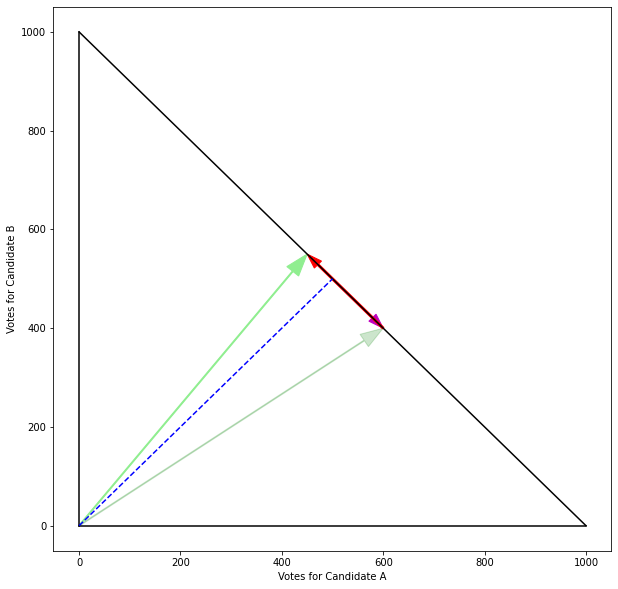

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0, N], [N, 0], color="black")
ax.plot([0, N], [0, 0], color="black")
ax.plot([0, 0], [0, N], color="black")
ax.plot([0, N/2], [0, N/2], 'b--')
ax.set_xlabel('Votes for Candidate A')
ax.set_ylabel('Votes for Candidate B')

origin = np.array([0, 0])

audited = np.array([450, 550])
reported = np.array([600, 400])
tie = np.array([500, 500])
margin =  reported - tie
ax.arrow(*tie, *margin, width=2, head_width=20, length_includes_head=True, color='m')

ax.arrow(*origin, *reported, width=2, head_width=30, length_includes_head=True, color='green', alpha=.2)
ax.arrow(*origin, *audited, width=2, head_width=30, length_includes_head=True, color='lightgreen')

error = audited - reported

ax.arrow(*reported, *error, width=4, head_width=20, length_includes_head=True, color='red')



If the error vector is as large or larger than the margin vector, than the election outcome was wrong. $$\vec{e} \geq \vec{m} \implies \text{wrong outcome}$$.